# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Собираем данные с Kaggle: <br>
World Happiness [2015-2017](https://www.kaggle.com/unsdsn/world-happiness), [2018](https://www.kaggle.com/njlow1202/world-happiness-report-data-2018)<br>
Kickstarter projects [2014-2019](https://www.kaggle.com/yashkantharia/kickstarter-campaigns)

### Happiness

Есть 4 разных файла csv -- по каждому году исследования. Подчистим каждый, приведём к общему виду факторы. Соберём в один датасет.

GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

In [2]:
hap15 = pd.read_csv("./data/2015.csv", index_col='Country')
hap16 = pd.read_csv("./data/2016.csv", index_col='Country')
hap17 = pd.read_csv("./data/2017.csv", index_col='Country')
hap18 = pd.read_csv("./data/WorldHappiness2018_Data.csv", index_col='Country')

In [3]:
hap15.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
hap15['Region'] = hap15.Region.astype('category')
hap15.drop(['Standard Error', 'Happiness Rank'], axis=1, inplace=True)
hap15.columns = ['region', 'happiness', 'economy', 'family', 
                 'health', 'freedom', 'trust', 'generosity', 'res']
hap15.sort_index(inplace=True)
hap15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
region        158 non-null category
happiness     158 non-null float64
economy       158 non-null float64
family        158 non-null float64
health        158 non-null float64
freedom       158 non-null float64
trust         158 non-null float64
generosity    158 non-null float64
res           158 non-null float64
dtypes: category(1), float64(8)
memory usage: 11.7+ KB


In [5]:
hap16.head()

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
hap16['Region'] = hap16.Region.astype('category')
hap16.drop(['Happiness Rank', 'Lower Confidence Interval', 
           'Upper Confidence Interval'], axis=1, inplace=True)
hap16.columns = ['region', 'happiness', 'economy', 'family', 
                 'health', 'freedom', 'trust', 'generosity', 'res']
hap16.sort_index(inplace=True)
hap16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
region        157 non-null category
happiness     157 non-null float64
economy       157 non-null float64
family        157 non-null float64
health        157 non-null float64
freedom       157 non-null float64
trust         157 non-null float64
generosity    157 non-null float64
res           157 non-null float64
dtypes: category(1), float64(8)
memory usage: 11.6+ KB


In [7]:
hap17.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
hap17.drop(['Happiness.Rank', 'Whisker.high', 
           'Whisker.low'], axis=1, inplace=True)
hap17.columns = ['happiness', 'economy', 'family', 
                 'health', 'freedom','generosity',  'trust', 'res']
hap17.sort_index(inplace=True)
hap17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
happiness     155 non-null float64
economy       155 non-null float64
family        155 non-null float64
health        155 non-null float64
freedom       155 non-null float64
generosity    155 non-null float64
trust         155 non-null float64
res           155 non-null float64
dtypes: float64(8)
memory usage: 10.9+ KB


In [9]:
hap18.head()

,Rank,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual
Country,,,,,,,,,
Finland,1,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988
Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723
Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779
Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564
Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675


In [10]:
hap18.drop('Rank', axis=1, inplace=True)
hap18.columns = ['happiness', 'economy', 'family', 
                 'health', 'freedom', 'generosity', 'trust', 'res']
hap18.sort_index(inplace=True)
hap18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
happiness     156 non-null float64
economy       156 non-null float64
family        156 non-null float64
health        156 non-null float64
freedom       156 non-null float64
generosity    156 non-null float64
trust         155 non-null float64
res           155 non-null float64
dtypes: float64(8)
memory usage: 11.0+ KB


Соберём всё в один df.

In [11]:
hap = pd.concat([hap15, hap16, hap17, hap18], 
                keys=['2015', '2016', '2017', '2018'],
               names=['year', 'country'], sort=False)

hap.index = hap.index.swaplevel('country', 'year')
hap.sort_index(inplace=True)
hap.reset_index(inplace=True)

Немного подчистим разнящиеся названия стран (например North Cyprus и Northern Cyprus) и допишем названия регионов.

In [12]:
c = { 'Hong Kong S.A.R., China': 'Hong Kong', 'Northern Cyprus': 'North Cyprus',
     'Somaliland region': 'Somaliland Region', 'Taiwan Province of China': 'Taiwan',
     'Trinidad & Tobago': 'Trinidad and Tobago'}
hap.country.replace(c, inplace=True)
hap.set_index('country', inplace=True)
hap.region = hap.region.ffill()

### Kickstarter

In [13]:
kick = pd.read_csv("./data/Kickstarter_projects_Feb19.csv", index_col='id')

In [14]:
kick.head()

,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
id,,,,,,,,,,,,,,,,,,,
1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


В исходном виде занимает 32мб памяти. Подчистим -- некоторые переменные подходят под категориальные, некоторые нам не пригодятся в анализе, дату запуска приведём в формат даты, статус проекта (успешный/провальный) переведём в логическую переменную.

In [15]:
col_list = ['currency', 'main_category', 'sub_category', 'country', 'status']
for col in col_list:
    kick[col] = kick[col].astype('category')
    
kick.drop(['deadline', 'city', 'state', 'start_Q', 'end_Q'],
          axis=1, inplace=True)

kick['launched_at'] = pd.to_datetime(kick.launched_at)

kick['status'] = kick.status.replace({'successful': True, 'failed': False}).astype(bool)
kick.rename(columns={'status': 'successful'}, inplace=True)

In [16]:
kick = kick[(kick.launched_at > '2015-01-01') & 
            (kick.launched_at < '2018-12-31')]

Используем почти в 3 раза меньше памяти :) <br>
Оставим 2015-2018г (как и happiness)

In [17]:
kick.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139046 entries, 1687733153 to 2054018879
Data columns (total 14 columns):
name             139046 non-null object
currency         139046 non-null category
main_category    139046 non-null category
sub_category     139046 non-null category
launched_at      139046 non-null datetime64[ns]
duration         139046 non-null float64
goal_usd         139046 non-null float64
country          139046 non-null category
blurb_length     139046 non-null int64
name_length      139046 non-null int64
successful       139046 non-null bool
start_month      139046 non-null int64
end_month        139046 non-null int64
usd_pledged      139046 non-null float64
dtypes: bool(1), category(4), datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 11.4+ MB


Переведём сокращённые названия стран в полные (как в Happiness)

In [18]:
print(*kick.country.unique())

US GB DE CA IT NZ FR BE ES SE MX AU DK CH HK NL SG NO AT IE JP LU


In [19]:
countries = {
    'US': 'United States', 'GB': 'United Kingdom', 'DE': 'Germany', 'CA': 'Canada', 'IT': 'Italy',
    'NZ': 'New Zealand', 'FR': 'France', 'BE': 'Belgium', 'ES': 'Spain', 'SE': 'Sweden', 'MX': 'Mexico',
    'AU': 'Australia', 'DK': 'Denmark', 'CH': 'Switzerland', 'HK': 'Hong Kong', 'NL': 'Netherlands', 
    'SG': 'Singapore', 'NO': 'Norway', 'AT': 'Austria', 'IE': 'Ireland', 'JP': 'Japan', 'LU': 'Luxembourg'
}
kick.country.replace(countries, inplace=True)

# EDA

### Happiness

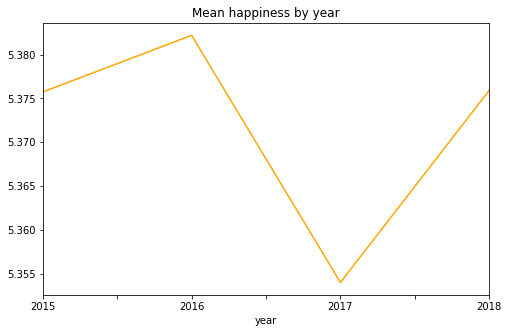

In [20]:
hap.groupby('year').happiness.mean().plot(title='Mean happiness by year', figsize=(8,5), color='orange');

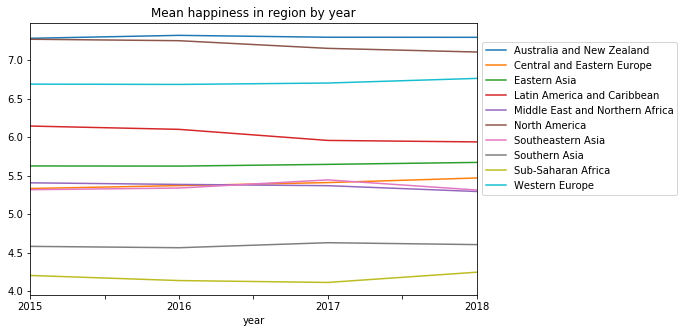

In [21]:
hap.pivot_table(index='year', columns='region', values='happiness').plot(title='Mean happiness in region by year',
                                                                        figsize=(8,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.65))
plt.show()

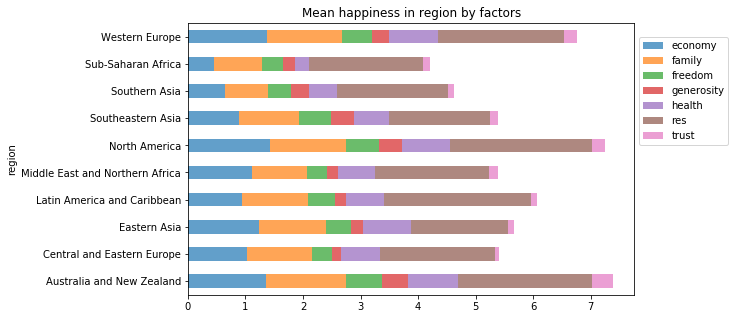

In [22]:
hap.pivot_table(index='region', values=['economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'res'], 
                aggfunc='mean').plot(kind='barh', stacked=True, title='Mean happiness in region by factors',
                                    figsize=(8,5), alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.show()

In [23]:
top5 = hap[['year', 'happiness']].groupby('year')['happiness'].apply(lambda grp: grp.nlargest(5))
print('Top 5 countries by happiness in each year\n\n', top5)
top5 = top5.reset_index()

Top 5 countries by happiness in each year

 year  country    
2015  Switzerland    7.587
      Iceland        7.561
      Denmark        7.527
      Norway         7.522
      Canada         7.427
2016  Denmark        7.526
      Switzerland    7.509
      Iceland        7.501
      Norway         7.498
      Finland        7.413
2017  Norway         7.537
      Denmark        7.522
      Iceland        7.504
      Switzerland    7.494
      Finland        7.469
2018  Finland        7.632
      Norway         7.594
      Denmark        7.555
      Iceland        7.495
      Switzerland    7.487
Name: happiness, dtype: float64


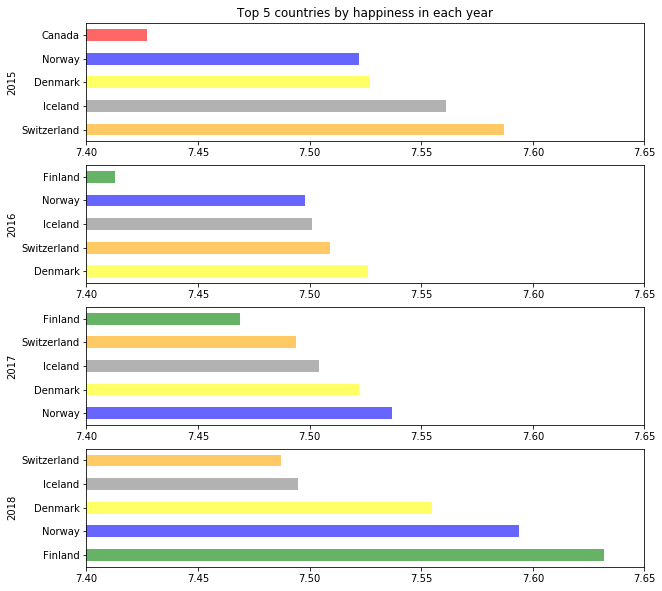

In [24]:
switcher = {0: ['orange', 'gray', 'yellow', 'blue', 'red'], 
            1: ['yellow', 'orange', 'gray', 'blue', 'green'], 
            2: ['blue', 'yellow', 'gray', 'orange', 'green'], 
            3: ['green', 'blue', 'yellow', 'gray', 'orange']}
for n in range(4):
    plt.subplot(4,1,n+1)
    top5[top5.year == str(2015+n)].set_index('country')['happiness'].plot(kind='barh', figsize=(10,10), 
                                                                         color=switcher.get(n), alpha=0.6)
    if n==0: plt.title('Top 5 countries by happiness in each year')
    plt.ylabel(str(2015+n))
    plt.xlim(7.4, 7.65)
plt.show()

### Kickstarter

In [25]:
print('Проекты по каким странам есть?\n\n', kick.country.value_counts(), sep='')

Проекты по каким странам есть?

United States     92326
United Kingdom    16683
Canada             7097
Australia          3516
Germany            2989
France             2345
Italy              2021
Mexico             2013
Spain              1671
Netherlands        1359
Sweden             1186
Hong Kong           921
Denmark             777
New Zealand         669
Singapore           627
Switzerland         590
Ireland             544
Belgium             484
Austria             449
Norway              417
Japan               308
Luxembourg           54
Name: country, dtype: int64


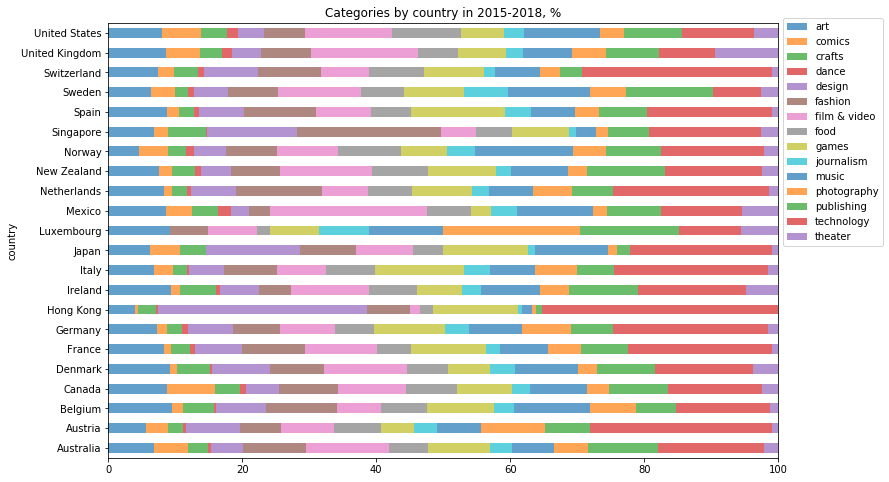

In [26]:
s = pd.DataFrame(kick.groupby('country').main_category.value_counts())
s.columns = ['category_sum']
s = s.pivot_table(index='country', columns='main_category', values='category_sum')
s['sum'] = s.sum(axis=1)
s = s.iloc[:, :-1].div(s['sum'], axis=0) * 100
s.plot(kind='barh', stacked=True, title='Categories by country in 2015-2018, %', xlim=(0,100), figsize=(12,8), alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75));

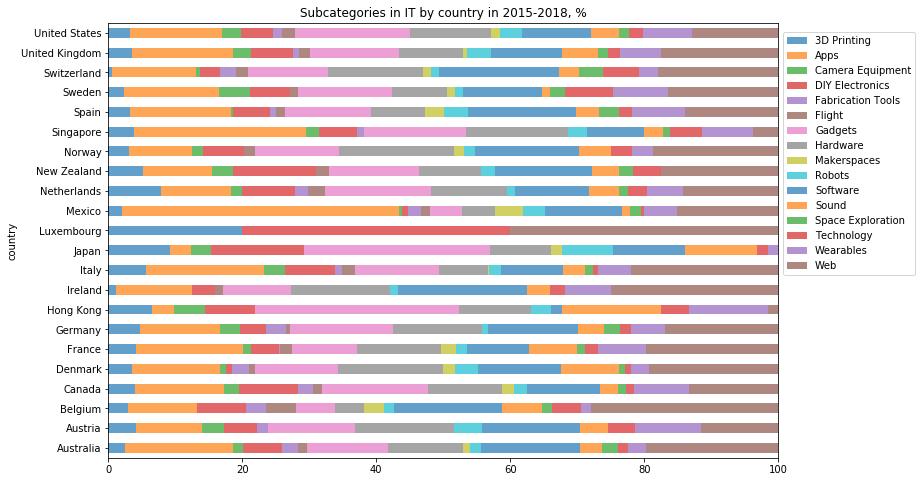

In [27]:
s = pd.DataFrame(kick[kick.main_category == 'technology'].groupby('country').sub_category.value_counts())
s.columns = ['sub_category_sum']
s = s.pivot_table(index='country', columns='sub_category', values='sub_category_sum')
s['sum'] = s.sum(axis=1)
s = s.iloc[:, :-1].div(s['sum'], axis=0) * 100
s.plot(kind='barh', stacked=True, title='Subcategories in IT by country in 2015-2018, %', xlim=(0,100), figsize=(12,8), alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.7));

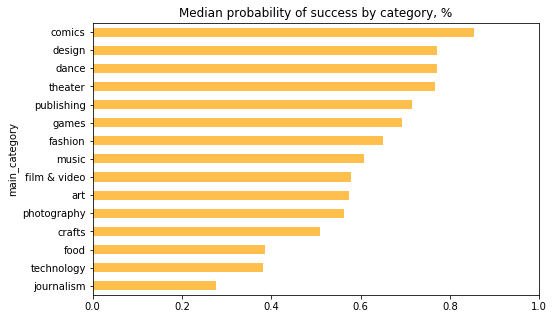

In [188]:
kick.groupby('main_category').successful.mean().sort_values().plot(kind='barh', xlim=(0,1), figsize=(8,5), alpha=0.7,
                                                     title='Median probability of success by category, %', color='orange');

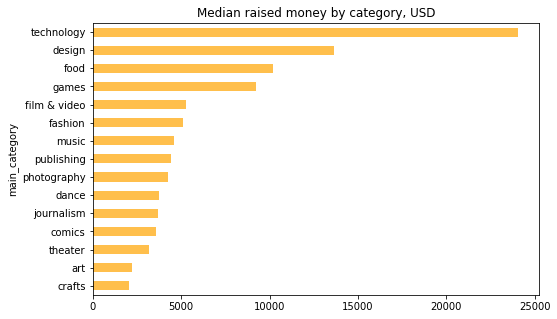

In [189]:
kick[kick.successful].groupby('main_category').usd_pledged.median().sort_values().plot(kind='barh', figsize=(8,5), alpha=0.7,
                                                     title='Median raised money by category, USD', color='orange');

In [178]:
sub_df = kick[['name', 'goal_usd', 'usd_pledged', 'main_category', 'sub_category', 'launched_at']][kick.goal_usd < kick.usd_pledged]
sub_df.drop_duplicates('name', keep='first', inplace=True)
sub_df['launched_at'] = sub_df.launched_at.dt.year
sub_df.set_index('name', inplace=True)
sub_df['exceeded_usd'] = sub_df['usd_pledged']-sub_df['goal_usd']
sub_df['exceeded_pct'] = sub_df['exceeded_usd'] / sub_df['goal_usd'] * 100

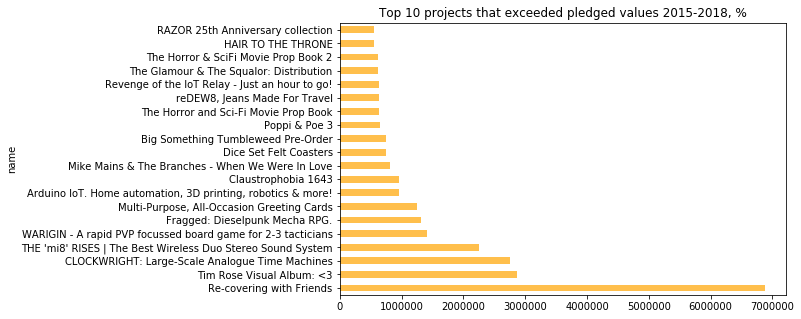

In [180]:
sub_df.exceeded_pct.nlargest(20).plot(kind='barh', title='Top 10 projects that exceeded pledged values 2015-2018, %', 
                                      color='orange', alpha=0.7, figsize=(8,5));

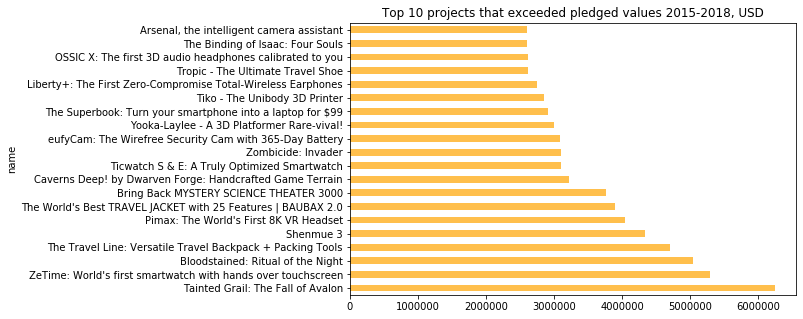

In [181]:
sub_df.exceeded_usd.nlargest(20).plot(kind='barh', title='Top 10 projects that exceeded pledged values 2015-2018, USD', 
                                      color='orange', alpha=0.7, figsize=(8,5));

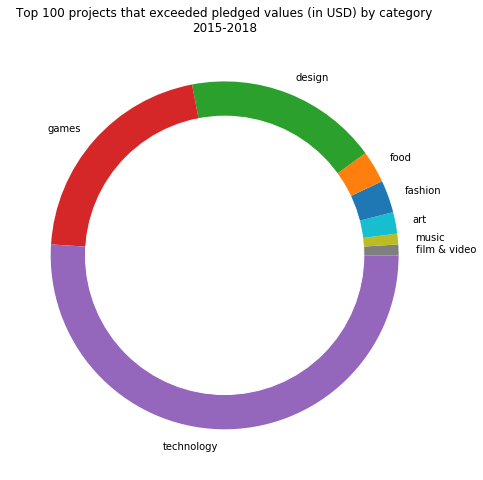

In [186]:
sub_df.nlargest(100, 'exceeded_usd').reset_index().groupby('main_category').\
  exceeded_usd.count().sort_values().plot.pie(figsize=(8,8), 
title='Top 100 projects that exceeded pledged values (in USD) by category\n2015-2018')
plt.ylabel('')
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.show()

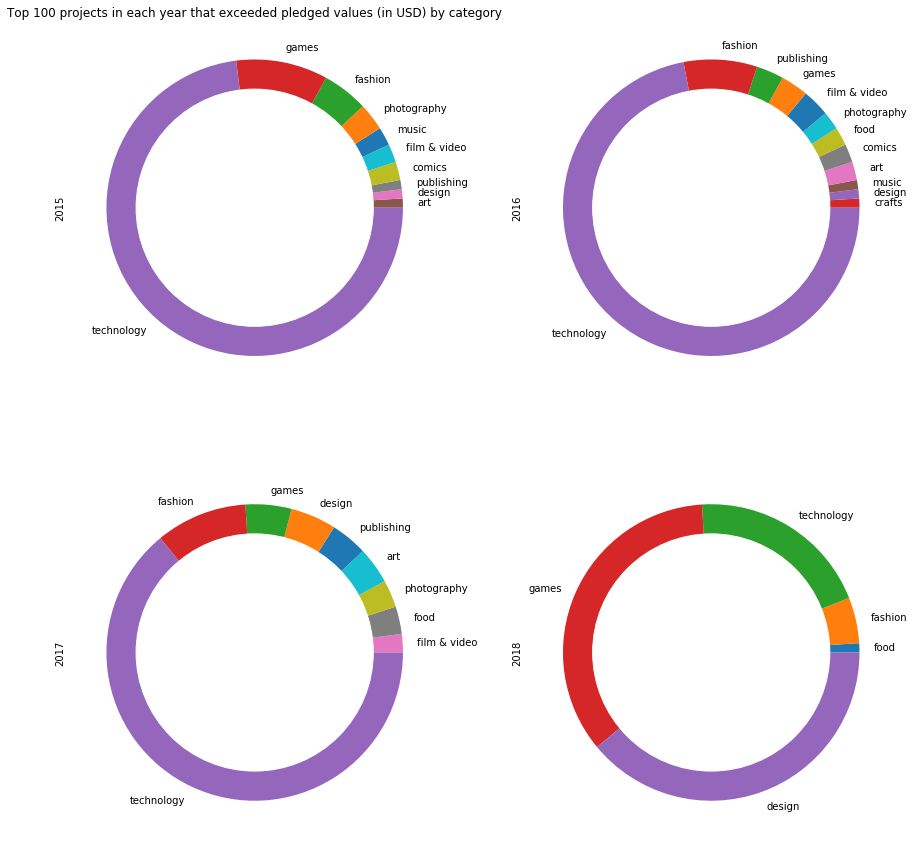

In [183]:
for n in range(4):
    plt.subplot(2,2,n+1)
    sub_df[sub_df.launched_at == (2015+n)].nlargest(100, 'exceeded_usd').reset_index().groupby('main_category').\
      exceeded_pct.count().sort_values().plot.pie(figsize=(15,15))
    if n==0: plt.title('Top 100 projects in each year that exceeded pledged values (in USD) by category')
    plt.ylabel(str(2015+n))
    my_circle=plt.Circle( (0,0), 0.8, color='white')
    plt.gcf().gca().add_artist(my_circle)
plt.show()